## Import Data into Python Using Pandas

In [1]:
import pandas as pd

calldata = pd.read_csv('party_in_nyc.csv')
calldata.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


## Create Columns for Month, Day, and Time 
### Time is a tuple of (Hour, Minute, Second)

In [2]:
# Create time column

def getTime(created):
    time = (created.split()[-1])
    time = time.split(sep=':')
    time = tuple(time)
    return time

def getMonth(created):
    month = (created.split()[0])
    month = month.split(sep = '-')
    month = month[1]
    return month

def getDay(created):
    day = (created.split()[0])
    day = day.split(sep = '-')
    day = day[-1]
    return day

created_series = calldata.iloc[:,0]
month_series = created_series.apply(getMonth)
day_series = created_series.apply(getDay)
time_series = created_series.apply(getTime)

calldata = calldata.assign(Month=month_series.values)
calldata = calldata.assign(Day=day_series.values)
calldata = calldata.assign(Time=time_series.values)

calldata.head()


,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,Month,Day,Time
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,12,31,"(00, 01, 15)"
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,12,31,"(00, 02, 48)"
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371,12,31,"(00, 03, 25)"
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668,12,31,"(00, 03, 26)"
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516,12,31,"(00, 05, 10)"


In [3]:
calldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 11 columns):
Created Date     225414 non-null object
Closed Date      224619 non-null object
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
Month            225414 non-null object
Day              225414 non-null object
Time             225414 non-null object
dtypes: float64(3), object(8)
memory usage: 18.9+ MB


## Plot all calls by longitude/latitude

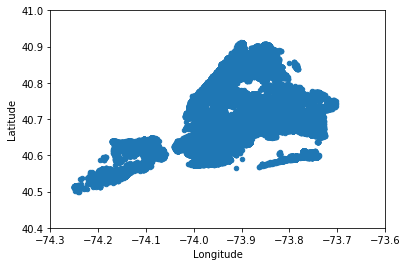

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

calldata.plot(kind = 'scatter',x='Longitude',y='Latitude',xlim = (-74.3,-73.6),ylim = (40.4,41))

## Plot only store/commercial calls by longitude/latitude

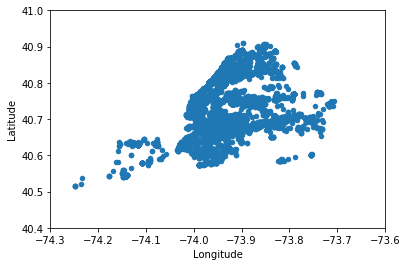

In [5]:
howdata = calldata.loc[calldata['Location Type'] == 'Store/Commercial']
howdata.plot(kind = 'scatter',x='Longitude',y='Latitude',xlim = (-74.3,-73.6),ylim = (40.4,41))

## hexbin and density plot of all calls by longitude/latitude

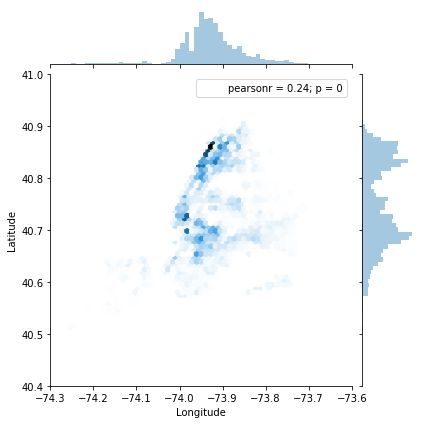

In [6]:
import seaborn as sns
sns.jointplot(x="Longitude", y="Latitude", data=calldata, kind="hex",xlim = (-74.3,-73.6),ylim = (40.4,41))

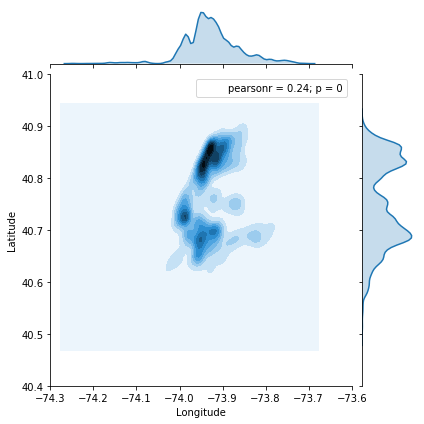

In [7]:
sns.jointplot(x="Longitude", y="Latitude", data=calldata, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))